In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [3]:
import numpy as np
data = np.loadtxt('ex1data1.txt',delimiter =',')

In [4]:
x = data[:,0].reshape(-1,1) # we used to make our input to be 2d as expected by the LinearRegression model
y = data[:,1]

In [ ]:
x.shape

(97, 1)

In [ ]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
alg1.coef_

array([1.25823915])

In [ ]:
alg1.intercept_

-4.8997815549389125

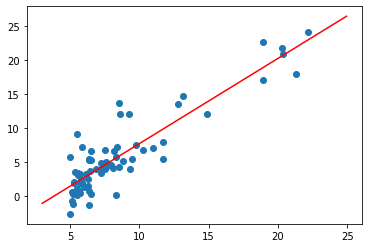

In [ ]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(3,25,0.05)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")

train_1d = X_train.reshape(72)
plt.scatter(X_train,Y_train)
plt.show()

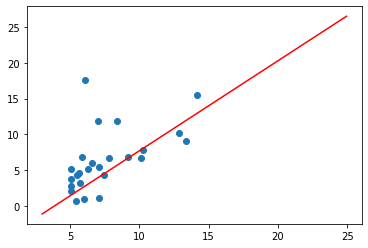

In [ ]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(3,25,0.05)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")

test_1d = X_test.reshape(25)
plt.scatter(X_test,Y_test)
plt.show()

In [ ]:
score_test = alg1.score(X_test, Y_test)
score_train = alg1.score(X_train, Y_train)
score_test, score_train

(0.06226543458400202, 0.8062708166469844)

In [6]:
x = data[:,0]
y = data[:,1]
x.shape

(97,)

In [8]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x, y, test_size = 0.3)

In [13]:
def fit(x,y):
  num = (x*y).mean() - x.mean() * y.mean()
  den = (x**2).mean() - x.mean()**2
  m = num/den
  c = y.mean() - m * x.mean()

  return m,c 

In [14]:
def predict(x,m,c):
    return m*x + c

In [17]:
def score(y_truth, y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v =((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

In [18]:
def cost(x, y, m, c):
  return ((y - m*x - c)**2).mean()

In [20]:
m, c = fit(X_train,Y_train)
y_test_pred = predict(X_test, m, c)
print("test score: ",score(Y_test, y_test_pred))

y_train_pred = predict(X_train, m, c)
print("train score: ",score(Y_train, y_train_pred))

print("M C:", m, c)
print("cost of training data: ", cost(X_train, Y_train, m, c))

test score:  0.782630620388096
train score:  0.6768904131479169
M C: 1.1941250884766044 -3.742547669061615
cost of training data:  10.831987751657424
